<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
     <img style="float: right; padding-right: 10px" width="100" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>
     </div>

**Clemson University**<br>
**Fall 2024**<br>
**Instructor(s):** Aaron Masino <br>

## Homework 5: Classification
This homework is intended to assess your knowledge of classification model concepts and implementation using Python scikit-learn. As presented in class, scikit-learn is a Python library that provides many tools for machine learning model development and analysis. For complete information, you may reference:
-  Python documentation [here](https://www.python.org/)
-  scikit-learn documentation [here](https://scikit-learn.org/stable/index.html)
-  Pandas documentation [here](https://pandas.pydata.org/)
-  matplotlib documentation [here](https://matplotlib.org/)
-  seaborn documentation [here](https://seaborn.pydata.org/)


# Setup Instructions
In the exercises below, you will use data from the following file(s). Make sure you have copied it to the appropriate location (e.g., _YOUR_COURSE_DIR/data_):
- BejaiaRegionDataset.csv

### Before beginning the exercises:
Execute the first two code cells to import the required Python packages and load the data

To begin, first import the Python packages that are required for this homework:

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix,  ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

SEED = 654321

In [ ]:
# mount the google drive - this is necessary to access supporting resources
from google.colab import drive
drive.mount("/content/drive")

Execute the code cell below to load data from the _BejaiaRegionDataset_ file into to Pandas DataFrame, `df_ff`. The data includes information about forest fires in the Bejaia region located in the northeast of Algeria.
- Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system:  7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1
- Classes: fire and not fire

In [ ]:
########### DO NOT MODIFY THIS CODE #############
df_ff = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cpsc-4300-6300/data/BejaiaRegionDataset.csv').drop(columns=['day', 'month', 'year'])
df_ff=df_ff.sample(frac=1, random_state=SEED).reset_index(drop=True)
# trim whitespace from Class column
df_ff['Classes'] = df_ff['Classes'].str.strip()
df_ff['Classes'] = df_ff['Classes'].apply(lambda x: 1 if x == 'fire' else 0)
display(df_ff.head())

df_ff_X = df_ff.drop(columns=['Classes'])
df_ff_y = df_ff['Classes']

df_ff[df_ff['Classes'] == 1]['Classes'].sum()

# Excercise 1 (1 point)

In the code cell below, complete the implementation of the function `tp_fp_tn_fn_counts`. The function inputs are:
- `y_true` a numpy array or Pandas Series of the actual class labels observed for a dataset
- `y_pred` a numpy array or Pandas Series of predicted class labels generated by a model
- `pos_label` the class label for the positive class

The function should return a tuple containing the following elements in the order listed

- `tp` the count of the true positive predictions for the given `pos_label` class
- `fp` the count of false positive predictions for the the given `pos_label` class
- `tn` the count of true negative predictions for the the given `pos_label` class
- `fn` the count of faluse negative predictions for the the given `pos_label` class

Note this function returns the `intra-class` counts, i.e., the counts relative to the `pos_label` class. For the case of multiple classes (i.e., more than two classes) in the actual class labels, if the `pos_label` is $c_j$ and the actual class label for a sample is $c_k \ne c_j$, and the predicted label is $c_l \ne c_j$, then the prediction is considered a true negative.

__Do not use scikit-learn methods in your solution. You may use numpy methods or core Python methods__

In [ ]:
def tp_fp_tn_fn_counts(y_true, y_pred, pos_label=1):
    tp, fp, tn, fn = 0, 0, 0, 0
    ########### START YOUR CODE HERE #############
    # DO NOT USE ANY LIBRARY OTHER THAN NUMPY

# Exercise 2 (1 point)

In the code cell below, complete the implementation of the function `balanced_accuracy`.
The function inputs are:
- `y_true` a numpy array or Pandas Series of the actual class labels observed for a dataset
- `y_pred` a numpy array or Pandas Series of predicted class labels generated by a model

The function should return a single scalar value representing the balanced accuracy socre.

Balanced accuracy is a metric that provides assessment of overall classificaiton accuracy that is useful when a dataset is _imbalanced_, i.e., when the number of samples belonging to each class is different. Assume the data contains $K$ classess. Let $p_k$ be the number of samples that are in class $k$. Let $tp_k$ be the number of true positives for class $k$, i.e., the number of samples that the model predicts are in class $k$ that actually are in class $k$. Let $fn_k$ be the number of false negatives for class $k$, i.e., the number of samples that are actually in class $k$ but the model predicts are in some class $j$ where $j\ne k$. Then the _balanced_accuracy_, $ba$, is defined as:

$ba = \sum_{i=1}^K \frac{tp_i}{tp_i+fn_i}$

__Do not use scikit-learn methods in your solution. You may use numpy methods and your implementation of `tp_fp_tn_fn_counts`__

__HINT__: It is necessary to identify the distinct classes in the

In [ ]:
def balanced_accuracy(y_true, y_pred):
    b_acc = None
    ########### START YOUR CODE HERE #############
    # DO NOT USE ANY LIBRARY OTHER THAN NUMPY
    # You can use the function tp_fp_tn_fn_counts

# Excercise 3 (1 point)
In the code cell below, a logistic regression model has been fit to the Algerian forest data using the default parameters. Using the fitted model, `model_lr`, print the variable name and coefficient value of the variable which causes the largest increase in the probability of fire for a unit change in the variable value. __HINT__: You need to access the coefficient values in `model_lr.coef_[0]`.

In [ ]:
model_lr = LogisticRegression(random_state=SEED, penalty=None, solver='lbfgs')
model_lr.fit(df_ff_X, df_ff_y)

########### START YOUR CODE HERE #############
var_name = None
coef_value = 0

# Exercise 4 (1 point)
Consider the following diagram of a decision tree fit to the Algerian forest data.

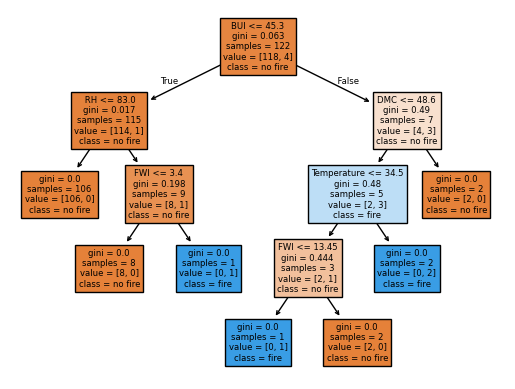

Enter your answers to the following questions in the markdown cell below:

########### YOUR ANSWER HERE #############<br/>
1. What is the depth of the tree?


2. How many terminal nodes are in the tree?


# Exercise 5 (1 point)

In the code cell below, use the scikit-learn `train-test_split` function to split the data in train and test sets. Assign the training set predictor and outcome values to the `X_train` and `y_train` variables, respectively. Assign the test set predictor and outcome values to the `X_test` and `y_test` variables, respectively Allocate 30% of the data to the test set. Be sure to set the `random_state` input equal to `SEED`.

In [ ]:
X_train, X_test, y_train, y_test = None, None, None, None

########### START YOUR CODE HERE #############

# Exercise 6 (1 point)

In the code cell below, use the scikit-learn `StandardScaler` class to standardize the training and test set predictor values. Store the standardized training and test set predictor variables in the `X_train_scaled` and `X_test_scaled` variables, respectively. Be sure to only fit the transformer using the training data.

In [ ]:
X_train_scaled, X_test_scaled = None, None

########### START YOUR CODE HERE #############


# Exercise 7 (1 point)

In preparation, to perform a systematic hyperparameter grid-search with cross validation to determine the best model to predict forest fires using the Algerian forest fire data, it is necessary to define the hyperparameter values for evaluation. In the code cell below, three models have been specified for testing:
- logistic regression ([sckit-learn docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html))
- random forest ([scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))
- gradient boosting classifier ([scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html))

For this excercise, in the code cell below, complete the param_grid dictionary to specify the hyperparameter values to be tested for each model. Your solution should use the following hyperparameter values:
- `logistic_regression`
    - `C` : [0.5, 1, 5]
    - `penalty` : ['l1', 'l2']
- `random_forest`
    - `n_estimators` : [10, 50, 100]
    - `max_depth` : [None, 3, 5]
    - `criterion` : ['gini', 'entropy']
- `gradient_boosting`
    - `n_estimators` : [5, 10, 25]
    - `learning_rate` : [0.01, 0.1, 1]

In [ ]:
models = {
    'logistic_regression': LogisticRegression(random_state=SEED, max_iter=1000, tol=0.001, solver='saga'),
    'random_forest': RandomForestClassifier(random_state=SEED),
    'gradient_boosting': GradientBoostingClassifier(random_state=SEED)
}

########### START YOUR CODE HERE #############
param_grid = None

# Excercise 8 (1 point)

In the code cell below, use the scikit-learn `GridSearchCV` class to apply k-fold cross-validation with K = 10 with a hyperparameter grid search for each of the three model instances created in the previous code cell. Assign the best model to the `model_best_fire` variable and the best cross-validation score to the `score_best_fire` variable.

In [ ]:
# declare variables to store the best model and score
model_best_fire = None
score_best_fire = 0.0

########### START YOUR CODE HERE #############


# Exercise 9 (1 point)
In the code cell below, use the best model from the previous exercise to predict the fire outcome for the test data, `X_test_scaled`. Display the confusion matrix for the test set predictions using the scikit-learn `ConfusionMatrixDisplay` class. Set the confusion matrix display lables to ['no fire', 'fire'].

In [ ]:
########### START YOUR CODE HERE #############
predictions = None

# Exercise 10 (1 point)
Based on the confusion matrix you created in the previous exercise, assuming `fire` is the postive class how many false negative and false postive predictions were made by the model? Enter you answer in the markdown cell below.

########### YOUR ANSWER HERE #############<br/>
1. False positives:
2. False negatives: